<a href="https://colab.research.google.com/github/vansh7nvc/AI-ML/blob/main/making_model_using_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

loading the data


In [ ]:
#importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('student_scores.csv')

understanding and visualizing the data

In [ ]:
df.shape

(25, 2)

In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

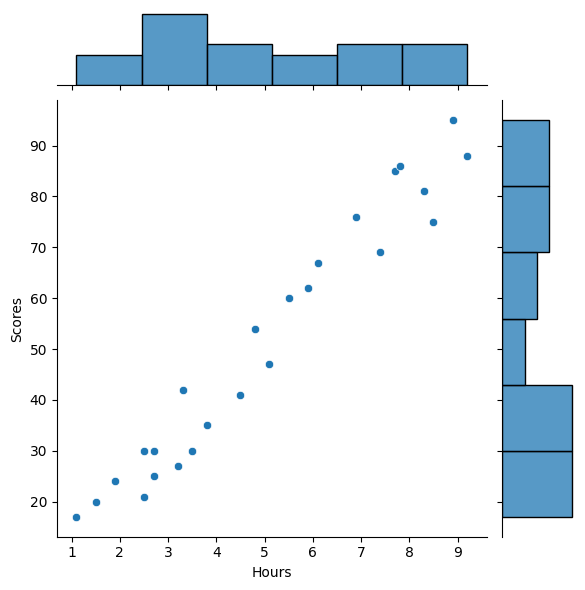

In [ ]:

sns.jointplot(x= 'Hours',y= 'Scores' , data = df,kind= 'scatter')

In [ ]:

df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<Axes: >

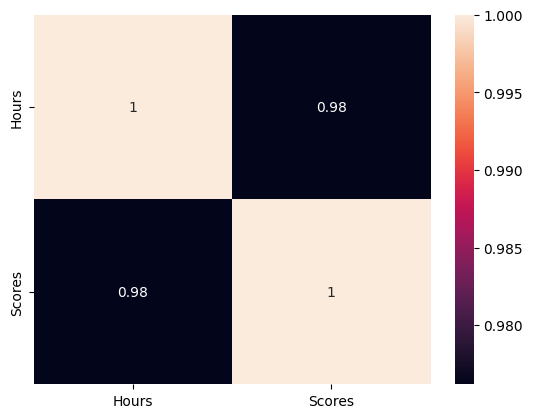

In [ ]:
plt.figure()
sns.heatmap(df.corr(),annot=True)


data preparation
1. splitting into train and test
2. recalling the variables( Normalisation and standardisation)
  - interpretability improves
  - model trains

In [ ]:
X = df[('Hours')]
y = df[('Scores')]

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

In [ ]:


print("Train",X_train.shape)
print("Test",X_test.shape)


Train (7,)
Test (18,)


In [ ]:
X_train.head()

,Hours
7,5.5
20,2.7
3,8.5
0,2.5
21,4.8


In [ ]:
X_test.head()

,Hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [ ]:
# data preparation
# 1. splitting into train and test
# 2. recalling the variables( Normalisation and standardisation)
#   - interpretability improves
#   - model trains
# %%
# Select the 'Hours' column as a DataFrame (2D)
X = df[['Hours']]
y = df['Scores']
# %%
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)
# %%


print("Train",X_train.shape)
print("Test",X_test.shape)

# %%
X_train.head()
# %%
X_test.head()
# %%
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
# %%

Train (7, 1)
Test (18, 1)


LinearRegression()

In [ ]:
print('y intercept:',regressor.intercept_)
print('slope:',regressor.coef_)

y intercept: 1.0979263522987353
slope: [9.8479817]


residual analysis on training data

1. distribution of the residuals - distribution should be normal with zero mean
2. IID - check for patterns in residuals - there should not exist any pattern
3. homoscedasticity - the variance pf residual is the same for any value of x

In [ ]:
y_train_pred = regressor.predict(X_train)

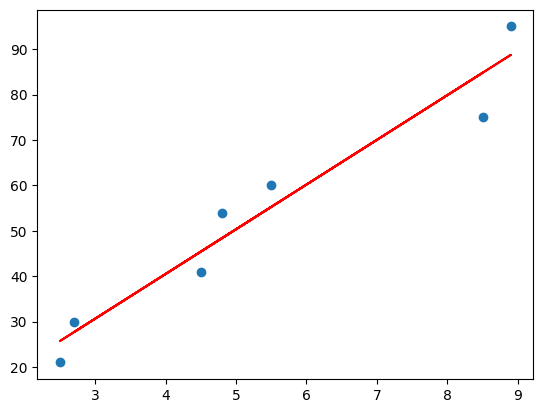

In [ ]:
plt.scatter(X_train['Hours'],y_train)

plt.plot(X_train['Hours'],y_train_pred,'r')

plt.show()

In [ ]:

residual = y_train - y_train_pred

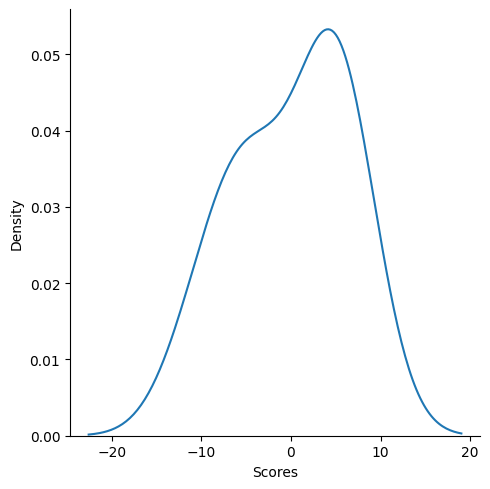

In [ ]:
sns.displot(residual,kind='kde')

making the prediction

In [ ]:
y_test_pred = regressor.predict(X_test)

In [ ]:
temp_df = pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})

In [ ]:
temp_df

,Actual,Predicted
5,20,15.869899
2,27,32.611468
19,69,73.972991
16,30,25.717881
11,62,59.201018
22,35,38.520257
17,24,19.809092
24,86,77.912184
23,76,69.049000
14,17,11.930706


evaluating the algorithm

In [ ]:
from sklearn import metrics

print('Mean absolute error:',metrics.mean_absolute_error(y_test,y_test_pred))
print('Mean squared error:', metrics.mean_squared_error(y_test,y_test_pred))
print('Root mean squared error:',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

Mean absolute error: 5.0017874859583955
Mean squared error: 28.474750355381598
Root mean squared error: 5.336173756108547


In [ ]:
metrics.median_absolute_error(y_test,y_test_pred)

np.float64(4.647811969596344)

In [ ]:
print(metrics.r2_score(y_test,y_test_pred))

0.9546671754868552


In [ ]:
r2=metrics.r2_score(y_test,y_test_pred)
n=len(X_test)
p=1
r2_adj=1-(1-r2)*(n-1)/(n-p-1)
print(r2_adj)

0.9518338739547837


model building using statmodels

In [ ]:

import statsmodels.api as sm

In [ ]:
# add a constant to get an intercept

X_train_sm = sm.add_constant(X_train)

# fit the regression line using the 'OLS'
lr = sm.OLS(y_train,X_train_sm).fit()

In [ ]:
lr.params

,0
const,1.097926
Hours,9.847982


In [ ]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     79.37
Date:                Tue, 17 Jun 2025   Prob (F-statistic):           0.000297
Time:                        11:50:04   Log-Likelihood:                -22.253
No. Observations:                   7   AIC:                             48.51
Df Residuals:                       5   BIC:                             48.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0979      6.453      0.170      0.8

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


understanding the above statistical summary about the model

interpret the below things
1. coefficent & it's p-value
2. R-squared value
3. p-value of F Statistics

1. Coefficent for hours = 1.0165 and its p-value is 0
coefficent is statistically significant

2. R-square is 0.941
3. observe the F-statistics has a very low p-value complete model
is statistically significant


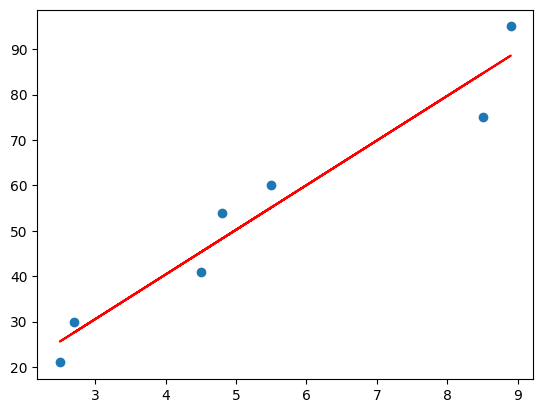

In [ ]:

plt.scatter(X_train['Hours'],y_train)

plt.plot(X_train['Hours'],1.0165 + 9.840 * X_train['Hours'],'r')

plt.show()

Residual analysis

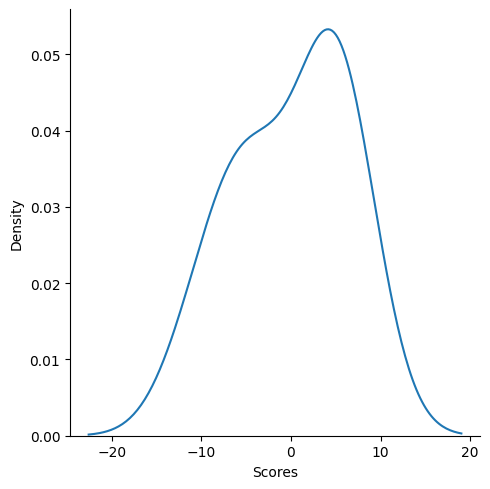

In [ ]:
residual = y_train - y_train_pred
sns.displot(residual,kind='kde')